In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import uproot
import awkward as ak
import glob
#import glob
#import mplhep as hep
#hep.style.use("CMS")

In [6]:
fileNames = glob.glob("/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBBGluGluH_M70_ToBB/*.parquet")
df = pd.read_parquet(fileNames[:100])

(array([   0.,   27.,   95.,  146.,  226.,  362.,  511.,  738., 1105.,
        1517., 1573., 1402.,  908.,  564.,  362.,  299.,  244.,  221.,
         203.,  205.,  159.,  167.,  155.,  122.,  148.,  108.,  130.,
         122.,   81.,   78.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ,
        106.66666667, 113.33333333, 120.        , 126.66666667,
        133.33333333, 140.        , 146.66666667, 153.33333333,
        160.        , 166.66666667, 173.33333333, 180.        ,
        186.66666667, 193.33333333, 200.        ]),
 <BarContainer object of 30 artists>)

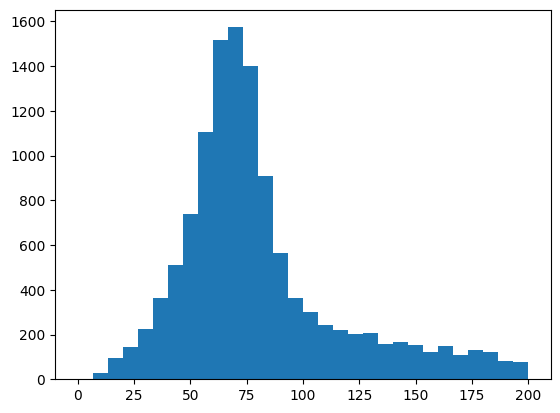

In [7]:
fig, ax =plt.subplots(1, 1)
bins = np.linspace(0, 200, 31)
ax.hist(df.dijet_mass, bins=bins)

In [23]:
filePath = "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/GluGluHToBB/others/GluGluHToBB_199.parquet"
df = pd.read_parquet(filePath)

filePath = "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/Data1A/others/Data_1017.parquet"
dfd = pd.read_parquet(filePath)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
bins = np.arange(0, 6)
ax[0,0].hist(df.jet1_nMuons, bins=bins, weights=np.ones(len(df))/len(df) ,label='ggH', alpha=0.4)
ax[0,0].hist(dfd.jet1_nMuons, bins=bins, weights=np.ones(len(dfd))/len(dfd) ,label='Data', alpha=0.4)
ax[0,0].set_title("jet1 nMuons")
ax[0,0].legend()
ax[0,0].set_yscale('log')


ax[0,1].hist(np.clip(df.jet1_nTightMuons, bins[0], bins[-1]), bins=bins, weights=np.ones(len(df))/len(df), label='ggH', alpha=0.4)
ax[0,1].hist(np.clip(dfd.jet1_nTightMuons, bins[0], bins[-1]), bins=bins, weights=np.ones(len(dfd))/len(dfd), label='Data', alpha=0.4)
ax[0,1].set_title("jet1 nMuons Tight")
ax[0,1].set_yscale('log')
ax[0,1].legend()

ax[1,0].hist(np.clip(df.jet2_nMuons, bins[0], bins[-1]), bins=bins, weights=np.ones(len(df))/len(df) ,label='ggH', alpha=0.4)
ax[1,0].hist(np.clip(dfd.jet2_nMuons, bins[0], bins[-1]), bins=bins, weights=np.ones(len(dfd))/len(dfd) ,label='Data', alpha=0.4)
ax[1,0].set_title("jet2 nMuons")
ax[1,0].legend()
ax[1,0].set_yscale('log')


ax[1,1].hist(df.jet2_nTightMuons, bins=bins, weights=np.ones(len(df))/len(df), label='ggH', alpha=0.4)
ax[1,1].hist(dfd.jet2_nTightMuons, bins=bins, weights=np.ones(len(dfd))/len(dfd), label='Data', alpha=0.4)
ax[1,1].set_title("jet2 nMuons Tight")
ax[1,1].set_yscale('log')
ax[1,1].legend()


FileNotFoundError: [Errno 2] No such file or directory: '/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/GluGluHToBB/others/GluGluHToBB_199.parquet'

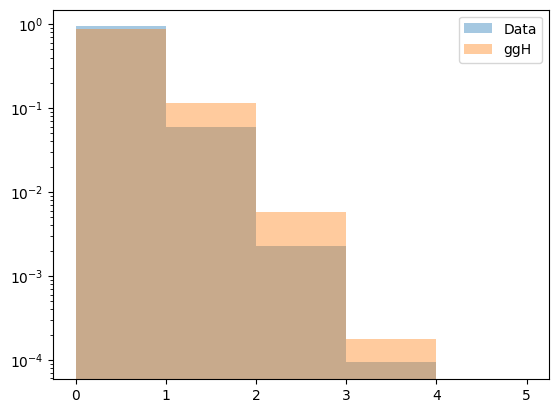

In [ ]:
fig, ax =plt.subplots(1, 1)
bins=np.arange(6)
ax.hist(dfd.jet1_nElectrons, bins=bins, weights=np.ones(len(dfd))/len(dfd), alpha=0.4, label='Data')
ax.hist(df.jet1_nElectrons, bins=bins, weights=np.ones(len(df))/len(df), alpha=0.4, label='ggH')
ax.legend()

ax.set_yscale('log')


In [30]:
import glob
dataPath ="/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/nanoaod_ggH/VBFHToBB2024Aug08/GluGluHToBB_M-125_TuneCP5_MINLO_NNLOPS_13TeV-powheg-pythia8/crab_GluGluHToBB/240808_065526/0000/*.root"
signalPath = "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/nanoaod_ggH/GluGluHToBB2024Mar05/GluGluHToBB_M-125_TuneCP5_13TeV-powheg-pythia8/crab_GluGluHToBB/240305_081723/0000/GluGluHToBB_Run2_mc_2024Mar05_*.root"
signalPath = glob.glob(signalPath)[:30]
dataPath  = glob.glob(dataPath)[:30]
#data = uproot.open(dataPath)

tree_name = "Events"  # Replace with the actual tree name if different
# Map the filename pattern to the desired TTree
signal_files_trees = {signal_path: tree_name for signal_path in signalPath}
data_files_trees = {data_path: tree_name for data_path in dataPath}

# Use uproot.concatenate with the mapping
branches = ["GenPart_pt", "GenPart_pdgId", "GenPart_statusFlags"]  # Specify branches to read, or None for all

# Load data using uproot.concatenate
try:
    signal = uproot.concatenate(
        signal_files_trees,
        branches=branches,
        library="ak"  # Use 'np' to get numpy arrays or 'pd' for pandas DataFrames
    )
    print("Signal data loaded successfully.")
except Exception as e:
    print(f"Error loading signal data: {e}")

try:
    data = uproot.concatenate(
        data_files_trees,
        branches=branches,
        library="ak"  # Use 'np' to get numpy arrays or 'pd' for pandas DataFrames
    )
    print("Data data loaded successfully.")
except Exception as e:
    print(f"Error loading signal data: {e}")



Signal data loaded successfully.
Data data loaded successfully.


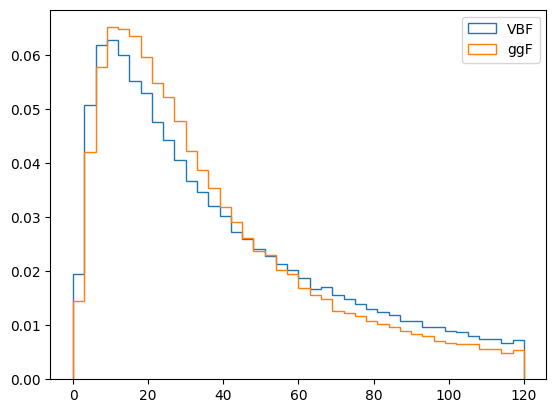

In [31]:
mVBF = data['GenPart_statusFlags']>=8192
mVBF = (mVBF) & (data['GenPart_pdgId']==25)
#data['GenPart_pt'][mVBF]

mggF = signal['GenPart_statusFlags']>=8192
mggF = (mggF) & (signal['GenPart_pdgId']==25)
#signal['GenPart_pt'][mggF]

fig, ax = plt.subplots(1, 1)
bins = np.linspace(0, 120, 41)
counts_VBF = np.histogram(data['GenPart_pt'][mVBF], bins=bins)[0]
counts_ggF = np.histogram(signal['GenPart_pt'][mggF], bins=bins)[0]

counts_VBF = counts_VBF/ak.sum(counts_VBF)
counts_ggF = counts_ggF/ak.sum(counts_ggF)
ax.hist(bins[:-1], bins=bins, weights=counts_VBF, histtype=u'step', label='VBF')
ax.hist(bins[:-1], bins=bins, weights=counts_ggF, histtype=u'step', label='ggF')
ax.legend()


In [ ]:
dataBranches = data['Events'].arrays()

In [ ]:
print(ak.sum(dataBranches['Jet_mass']<0), "/", len(dataBranches['Jet_mass']))
print(ak.sum(signal['Jet_mass']<0), "/", len(signal['Jet_mass']))
for el in signal[ak.sum(signal['Jet_mass']<0,axis=1)>0]['Jet_mass'][:10]:
    print(el)
print("Nan")
for el in signal['Jet_qgl'][ak.is_none(signal['Jet_qgl'])][:10]:
    print(el)
print(ak.sum(np.isnan(signal["Jet_qgl"])))


13 / 267679
37 / 510751
[8.72, 6.65, 3.77, 4.1, 3.06, -2.34e-06, 2.66, 1.9, 2.15]
[10.9, 6.22, 5.11, 3.96, 4.07, 2.8, 1.94, 2.62, -8.26e-07, 1.97]
[28.4, 12.9, 16.5, 10.9, 11.4, 4.61, ..., 2.08, 3.01, 3.31, 3.09, 3.44, 1.64]
[20.6, 14.4, 11.6, 6.76, 7.27, 4.06, 3.21, -3.3e-06]
[5.37, 4.82, 3.96, 4.21, 2.37, -1.91e-06]
[10.8, 6.38, 7.68, -3.82e-07, 2.68, 2.8]
[6.63, 4.26, 6.09, 3.98, 3.09, -2.7e-06, 2.29, 2.46]
[9.24, 10.6, 11.6, -3.59e-07, 2.79, 2.63]
[17.4, 4.66, 5.96, 5.64, 4.04, 2.91, ..., 2.37, 2.75, 3.06, 2.82, -1.91e-06]
[14.4, 18.2, 18, 8.32, 12.4, 7.46, 4.03, 2.38, 3.11, 1.49, 3.43, -4.13e-07]
Nan
2


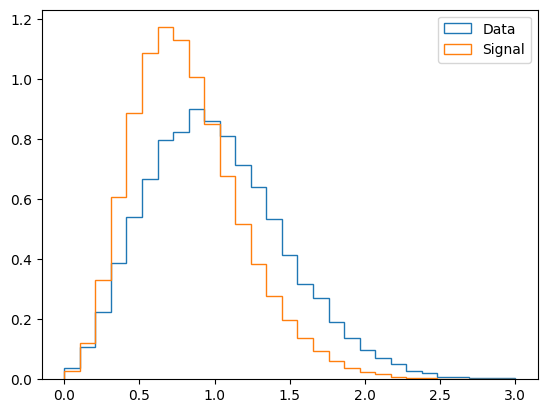

In [ ]:
fig, ax = plt.subplots(1, 1)
bins=np.linspace(0,3, 30)
ax.hist(ak.sum(signal['Jet_btagDeepFlavC'], axis=1), bins=bins, histtype=u'step', label="Data", density=True)
ax.hist(ak.sum(dataBranches['Jet_btagDeepFlavC'], axis=1), bins=bins, histtype=u'step', label="Signal", density=True)
#ax.set_yscale('log')
ax.legend()
#ax.hist(dataBranches['Muon_pfRelIso03_all'], bins=np.linspace(30,0, 30))

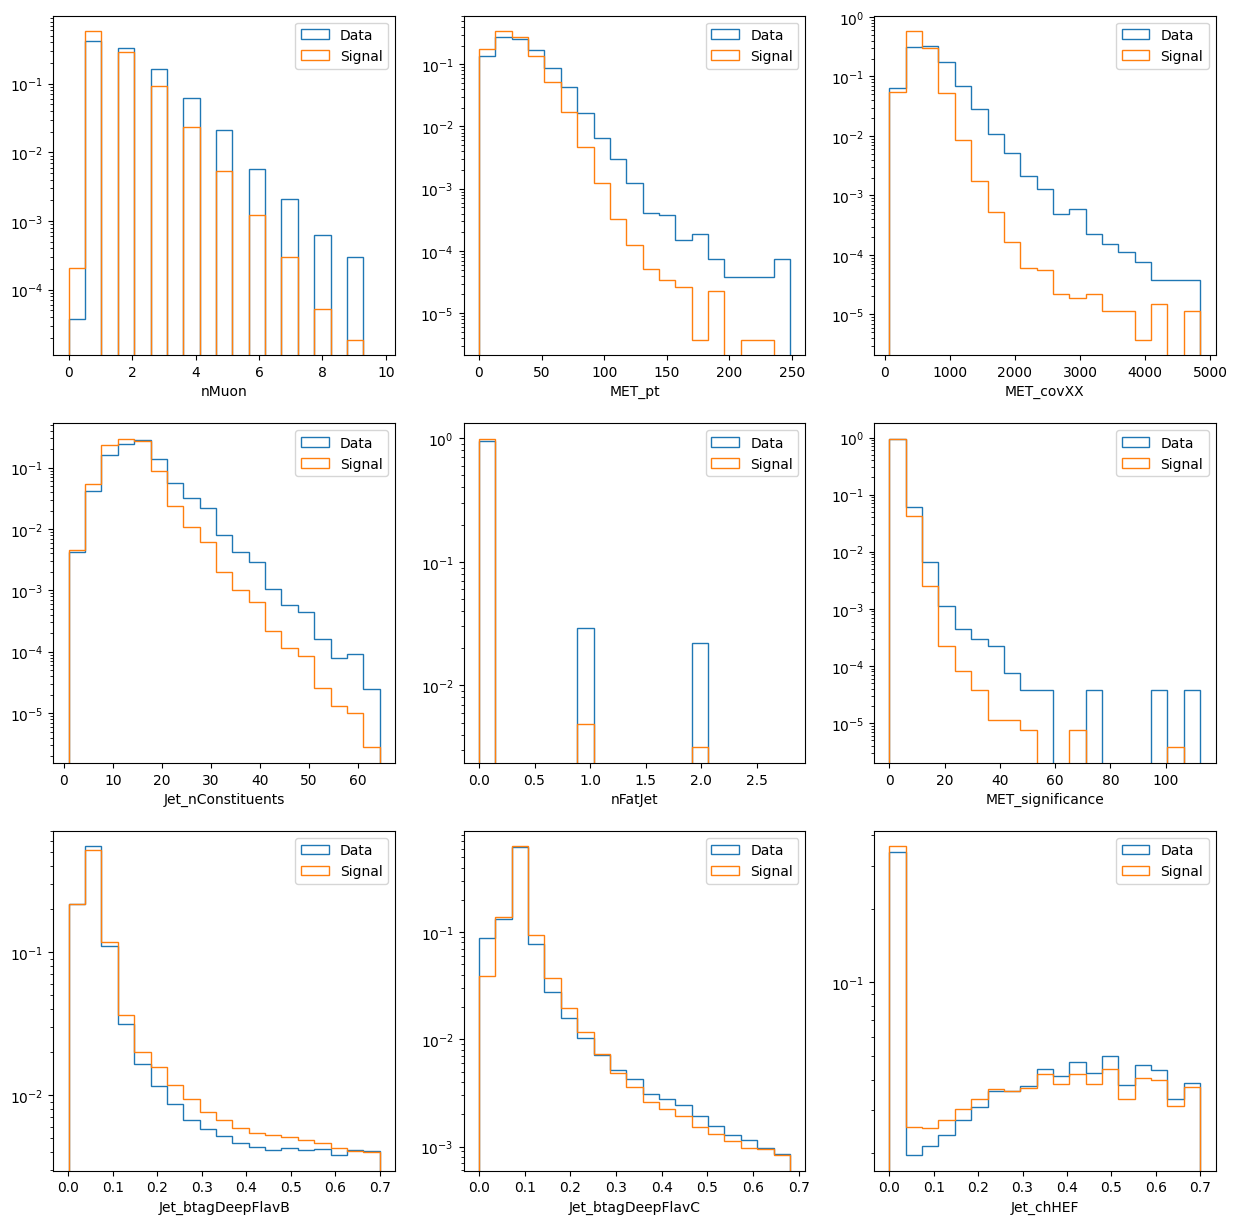

In [ ]:
features=['nMuon', 'MET_pt', 'MET_covXX', 'Jet_nConstituents', 'nFatJet', 'MET_significance', 'Jet_btagDeepFlavB',
            'Jet_btagDeepFlavC', 'Jet_chHEF']
fig, ax = plt.subplots(3, 3, figsize=(15,15))
for i in range(3):
    for j in range(3):
        feature=features[i*3+j]
        try:
            bins=np.linspace(np.min(signal[feature]), np.max(signal[feature])*0.7, 20)
            c1 = np.histogram(signal[feature], bins=bins)[0]
            c2= np.histogram(dataBranches[feature], bins=bins)[0]
            c1, c2=c1/np.sum(c1), c2/np.sum(c2)
        except:
            bins=np.linspace(np.min(ak.flatten(signal[feature])), np.max(ak.flatten(signal[feature]))*0.7, 20)
            c1 = np.histogram(ak.flatten(signal[feature]), bins=bins)[0]
            c2 = np.histogram(ak.flatten(dataBranches[feature]), bins=bins)[0]
            c1, c2 = c1/np.sum(c1), c2/np.sum(c2)
        ax[i, j].hist(bins[:-1], bins=bins, histtype=u'step', label="Data", weights=c1)
        ax[i, j].hist(bins[:-1], bins=bins, histtype=u'step', label="Signal", weights=c2)
        ax[i, j].set_yscale('log')
        ax[i, j].set_xlabel(feature)
        ax[i, j].legend()